# Introduction to "Deep Learning for Traffic Sign Classification"
Here, We are dealing with image classification on traffic signs using sign board's images. 
- We will train a deep CNN (Convolutional neural network) to classify traffic sign images. 
- Dataset contains 43 different classes of images of 32x32 pixels. 
- Coloured images consist of 3 RGB (red, green, blue) colours.

@Made by Swastik Dasgaonkar for all

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

- load dataset includes data for train (60%), validate (20%) and test (20%)
- validation purpose is to assess training quality as it proceeds and to overcome overfitting
- When your data is not in readable format, you can use pickle to save it in a binary format


In [6]:
with open("/content/drive/MyDrive/Colab Notebooks/open dataset/train.p", mode='rb') as training_data:
    train = pickle.load(training_data) 
with open("/content/drive/MyDrive/Colab Notebooks/open dataset/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/MyDrive/Colab Notebooks/open dataset/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

- Above data is available [here](https://drive.google.com/drive/folders/1-2-od3Bnb1Bs7k7YLe7sqdxRYfz9n4MB?usp=sharing) 
- [Caution!] Refer to proper file names

In [7]:
#Let's look at features of our datasets
print(train.keys())

dict_keys(['coords', 'labels', 'features', 'sizes'])


In [8]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [9]:
X_train.shape

(34799, 32, 32, 3)

In [10]:
y_train.shape

(34799,)

- now let's do image visualization

5

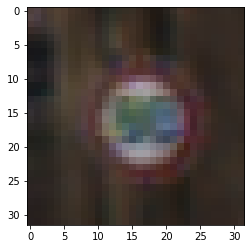

In [11]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

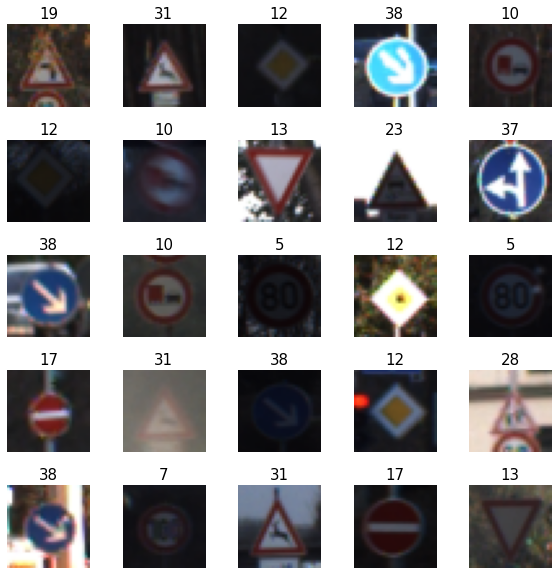

In [12]:
# Let's view more images in a grid format
W_grid = 5 
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel()              # flaten the 15 x 15 matrix into 225 array (changes 2D to flatten array)

for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, len(X_train))
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

- convert images to greyscale and perform normalization

In [13]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [14]:
X_train_gray.shape

(34799, 32, 32, 1)

In [15]:
X_test_gray.shape

(12630, 32, 32, 1)

In [16]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [17]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [18]:
X_train_gray_norm

array([[[[-0.67447917],
         [-0.796875  ],
         [-0.81770833],
         ...,
         [-0.44791667],
         [-0.6640625 ],
         [-0.80729167]],

        [[-0.7578125 ],
         [-0.76822917],
         [-0.75      ],
         ...,
         [-0.54947917],
         [-0.59114583],
         [-0.67447917]],

        [[-0.80208333],
         [-0.70572917],
         [-0.7265625 ],
         ...,
         [-0.4453125 ],
         [-0.44270833],
         [-0.65625   ]],

        ...,

        [[-0.61197917],
         [-0.69791667],
         [-0.84635417],
         ...,
         [-0.50260417],
         [-0.453125  ],
         [-0.36458333]],

        [[-0.59114583],
         [-0.69010417],
         [-0.80989583],
         ...,
         [-0.55208333],
         [-0.46354167],
         [-0.46614583]],

        [[-0.546875  ],
         [-0.63802083],
         [-0.76041667],
         ...,
         [-0.57552083],
         [-0.50260417],
         [-0.5078125 ]]],


       [[[-0.47135417],


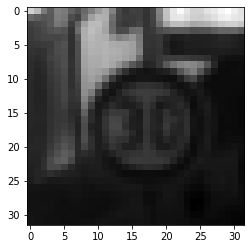

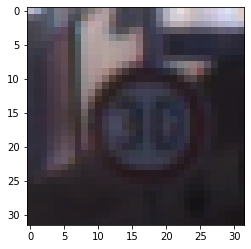

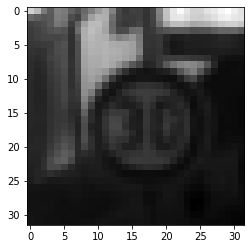

In [19]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray') #to remove 1D entries from shape of an array
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [20]:
#Build deep CNN model
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

#CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [21]:
#Compile and train deep CNN model
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = CNN.fit(X_train_gray_norm, y_train, 
                 batch_size = 500, epochs = 50, verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 15s 209ms/step - loss: 3.1977 - accuracy: 0.1628 - val_loss: 2.8747 - val_accuracy: 0.2649
Epoch 2/50
70/70 [==============================] - 15s 209ms/step - loss: 1.8665 - accuracy: 0.4895 - val_loss: 1.5851 - val_accuracy: 0.5610
Epoch 3/50
70/70 [==============================] - 15s 211ms/step - loss: 1.0241 - accuracy: 0.7078 - val_loss: 1.1343 - val_accuracy: 0.6816
Epoch 4/50
70/70 [==============================] - 15s 209ms/step - loss: 0.7162 - accuracy: 0.7977 - val_loss: 0.8852 - val_accuracy: 0.7444
Epoch 5/50
70/70 [==============================] - 15s 209ms/step - loss: 0.5586 - accuracy: 0.8461 - val_loss: 0.8113 - val_accuracy: 0.7603
Epoch 6/50
70/70 [==============================] - 15s 209ms/step - loss: 0.4594 - accuracy: 0.8747 - val_loss: 0.7285 - val_accuracy: 0.7866
Epoch 7/50
70/70 [==============================] - 15s 209ms/step - loss: 0.3898 - accuracy: 0.8967 - val_loss: 0.7133 - val_accuracy: 0.7946

In [22]:
#Assess and train CNN model performance using confusion matrix
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 3s 8ms/step - loss: 1.2652 - accuracy: 0.8654
Test Accuracy: 0.8653998374938965


- Test accuracy achieved upto 86.54%

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

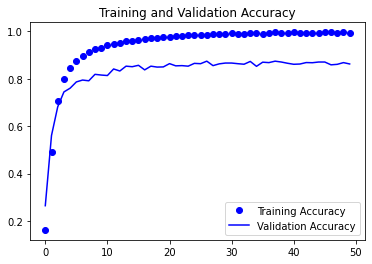

In [25]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

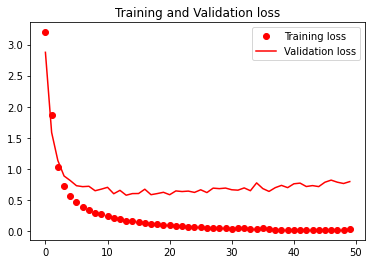

In [26]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [30]:
predicted_classes = CNN.predict(X_test_gray_norm).argmax(axis=1)  
#argmax(axis=1) keep it as 1D array which is required in 'cm()' in 'sns heatmap' given below
y_true = y_test

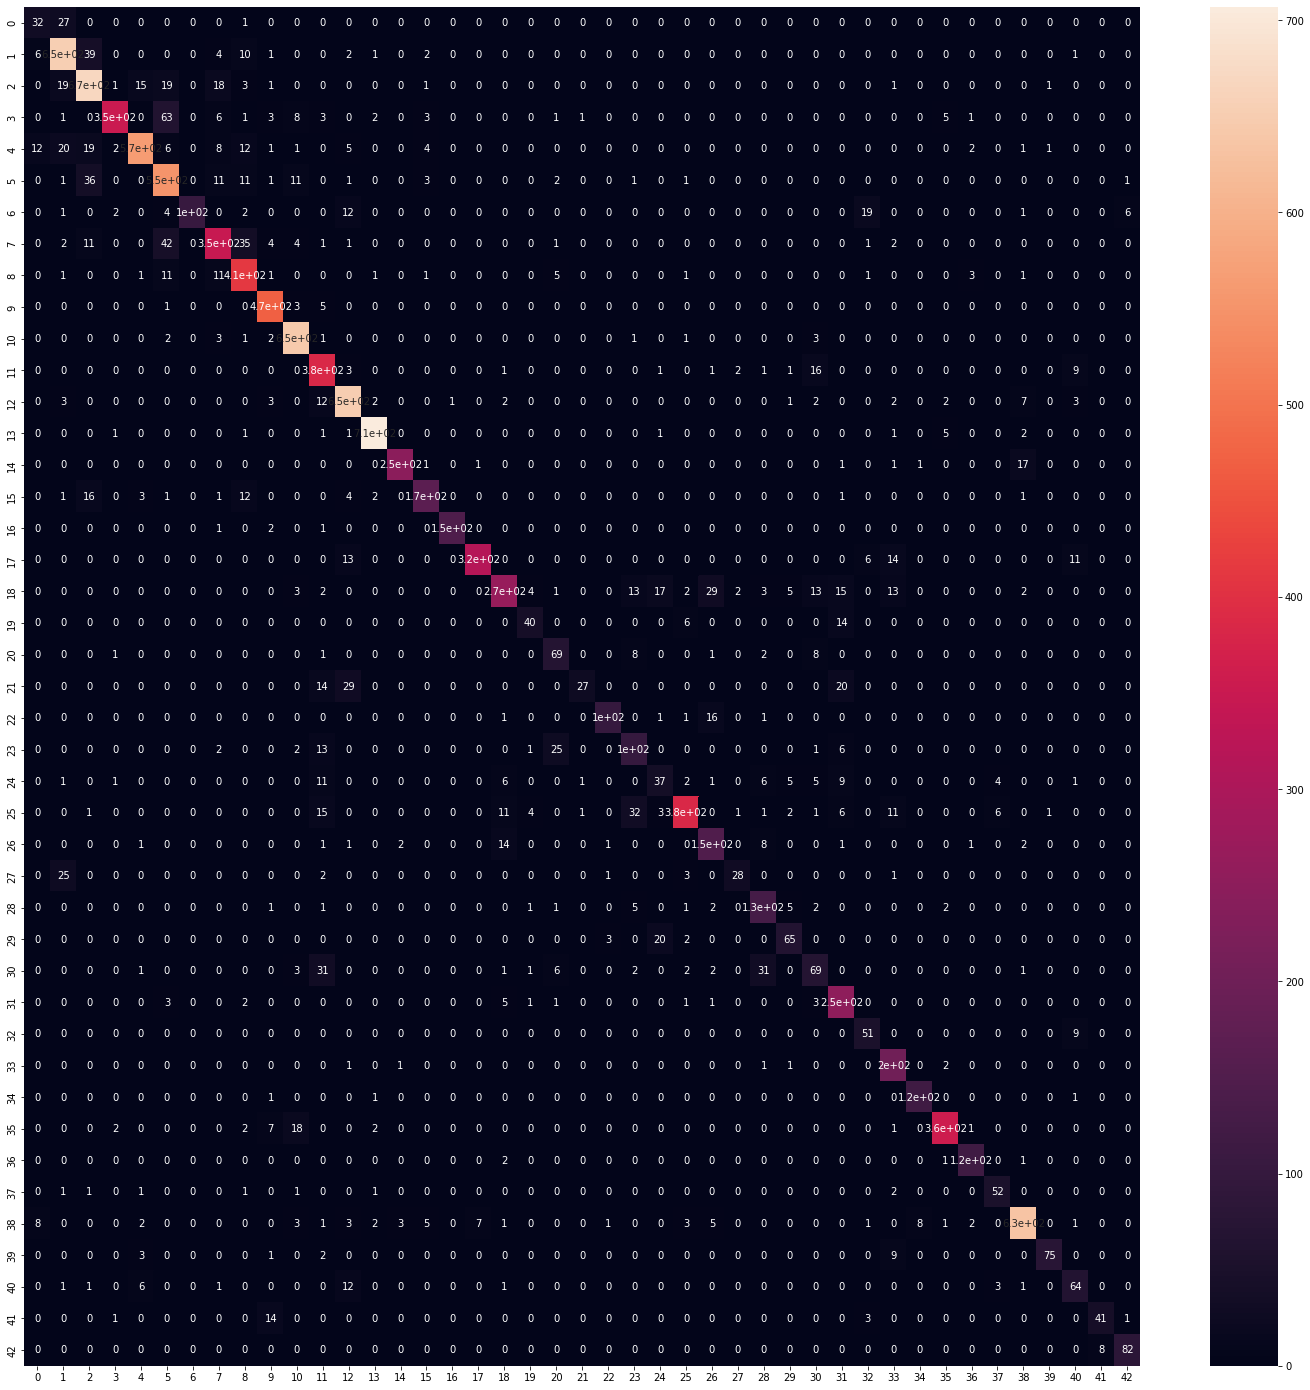

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes) 
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

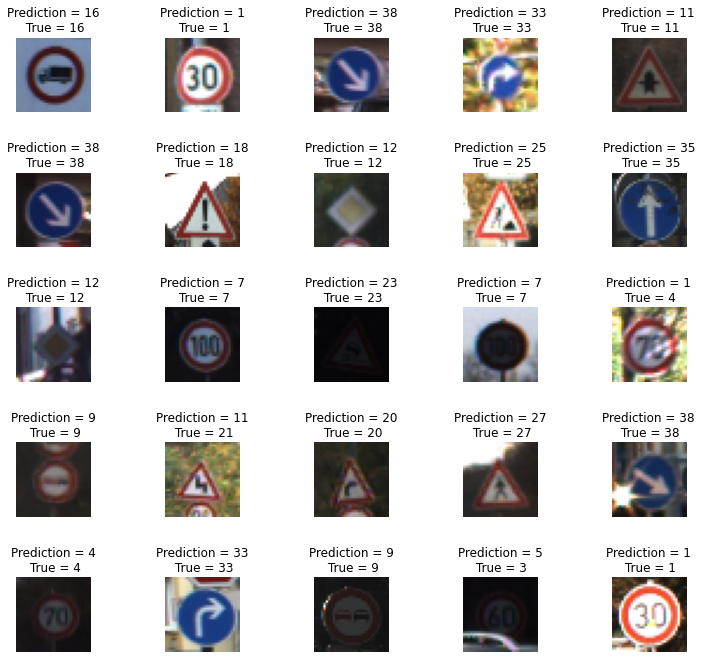

In [32]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

- In above test cases, we found 22 out of 25 images are correctly classified which is good indication of our results.
- We have successfully able to classified with test accuracy of 86.54% earlier.